In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
startup_df = pd.read_csv('50_Startups.csv')

In [3]:
startup_df.columns = ['RnD_Spend','Administration','Marketing_spending','State','Profit']

In [4]:
startup_df

,RnD_Spend,Administration,Marketing_spending,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RnD_Spend           50 non-null     float64
 1   Administration      50 non-null     float64
 2   Marketing_spending  50 non-null     float64
 3   State               50 non-null     object 
 4   Profit              50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup_df.shape

(50, 5)

In [7]:
startup_df.describe()

,RnD_Spend,Administration,Marketing_spending,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
startup_df.isnull().sum()

RnD_Spend             0
Administration        0
Marketing_spending    0
State                 0
Profit                0
dtype: int64

In [9]:
startup_df.columns = ['RnD_Spend','Administration','Marketing_spending','State','Profit']

# Correlation Matrix

In [10]:
startup_df.corr()

<ipython-input-10-832ef824a341>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  startup_df.corr()


,RnD_Spend,Administration,Marketing_spending,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_spending,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


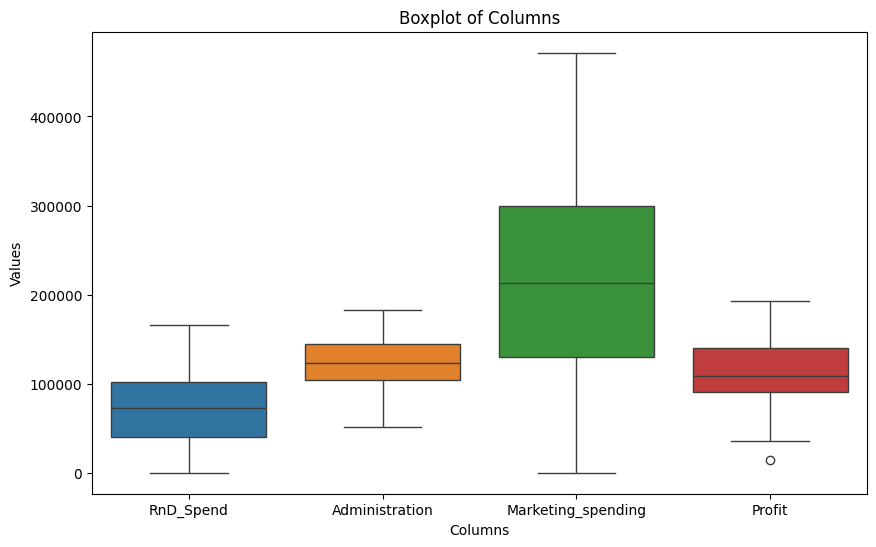

In [11]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=startup_df)
plt.title('Boxplot of Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# ScatterPlots

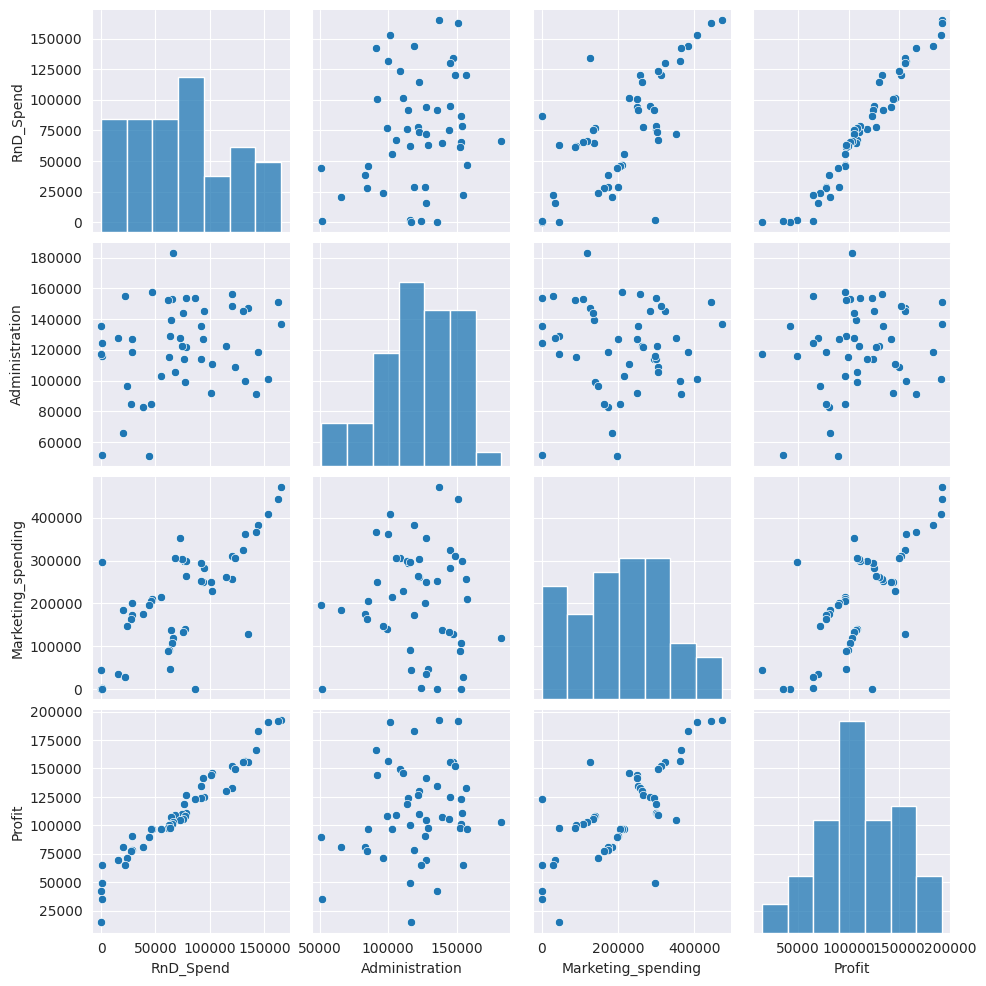

In [12]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(startup_df)

### Preparing a Model

In [13]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('Profit~RnD_Spend+Administration+Marketing_spending',data=startup_df).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.53e-30
Time:                        17:06:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend              0.8057      0.045     17.846      0.000       0.715       0.897
Administration        -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_spending     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Simple Linear Regression**

In [15]:
import statsmodels.formula.api as smf
ml_RnD=smf.ols('Profit~RnD_Spend',data = startup_df).fit()
#t and p-Values
print(ml_RnD.tvalues, '\n', ml_RnD.pvalues)

Intercept    19.320288
RnD_Spend    29.151139
dtype: float64 
 Intercept    2.782697e-24
RnD_Spend    3.500322e-32
dtype: float64


In [16]:
ml_RnD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           3.50e-32
Time:                        17:06:35   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD_Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
import statsmodels.formula.api as smf
ml_adm=smf.ols('Profit~Administration',data = startup_df).fit()
#t and p-Values
print(ml_adm.tvalues, '\n', ml_adm.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [18]:
ml_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 02 Apr 2024   Prob (F-statistic):              0.162
Time:                        17:06:35   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Calculating VIF**

In [19]:
rsq_RnD = smf.ols('RnD_Spend~Marketing_spending+Administration',data=startup_df).fit().rsquared
vif_RnD = 1/(1-rsq_RnD)

rsq_ms = smf.ols('Marketing_spending~RnD_Spend+Administration',data=startup_df).fit().rsquared
vif_ms = 1/(1-rsq_ms)

rsq_adm = smf.ols('Administration~Marketing_spending+RnD_Spend',data=startup_df).fit().rsquared
vif_adm = 1/(1-rsq_adm)

# Storing vif values in a data frame
d1 = {'Variables':['Administration','Marketing_spending','RnD_Spend'],'VIF':[vif_adm,vif_ms,vif_RnD]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Administration,1.175091
1,Marketing_spending,2.326773
2,RnD_Spend,2.468903


# **Residual Analysis**

# **Test for Normality of Residuals (Q-Q Plot)**

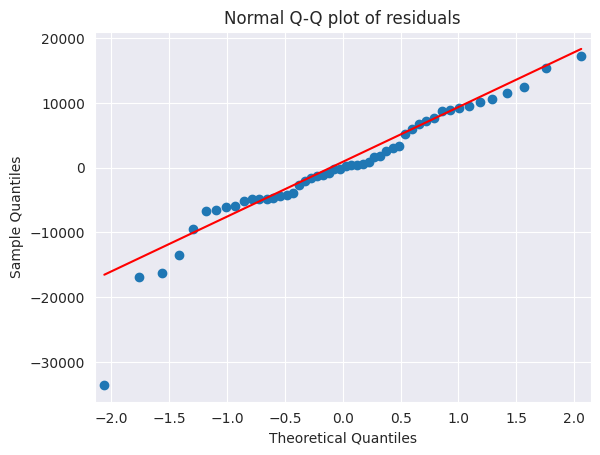

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# **Residual Plot for Homoscedasticity**

In [21]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

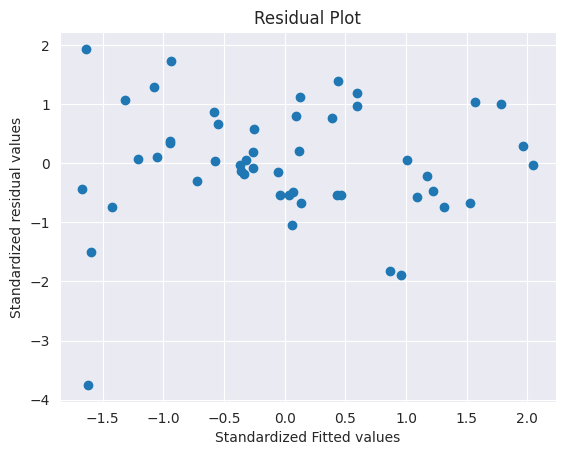

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# **Residual Vs Regressors**

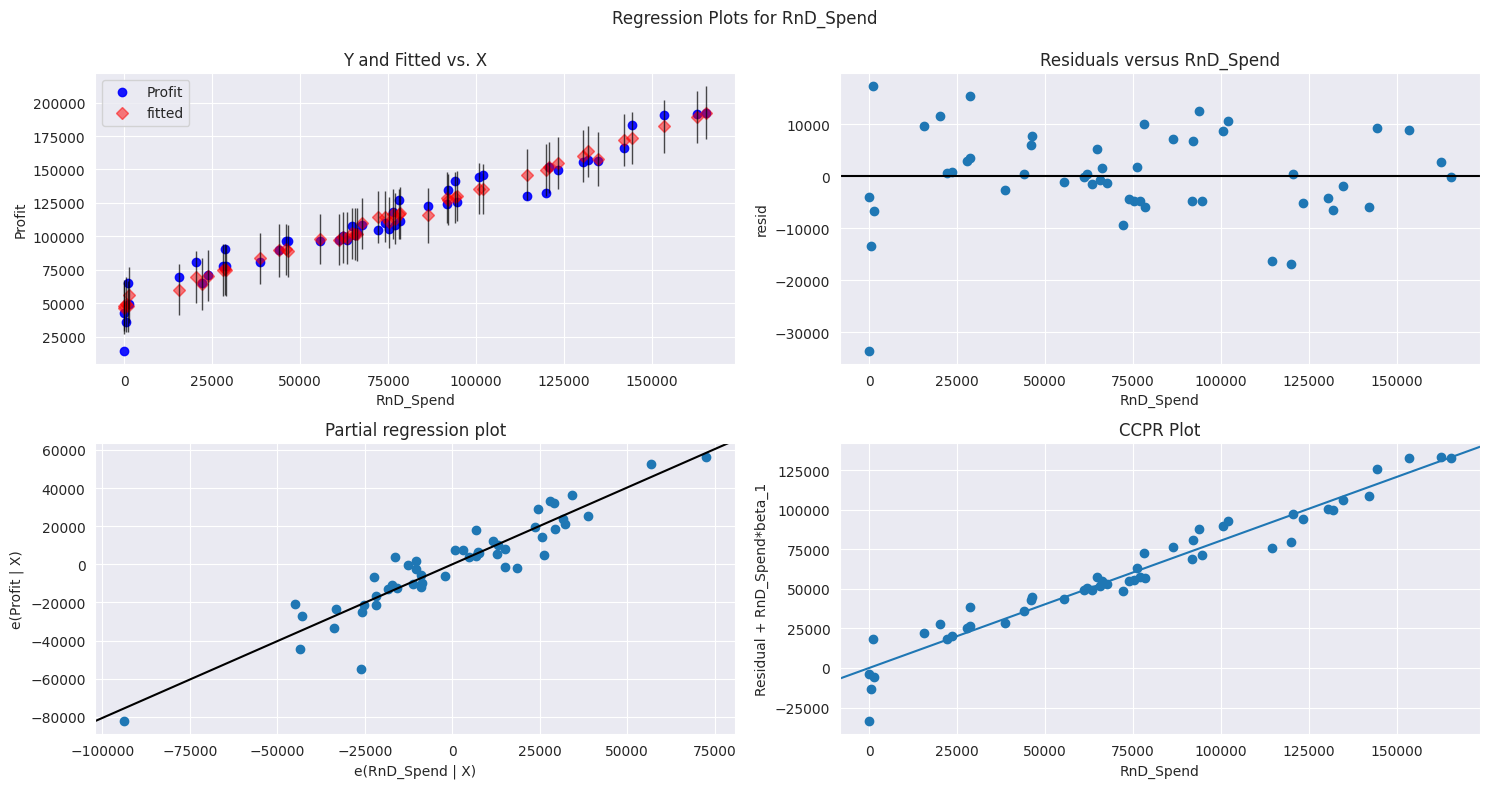

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD_Spend", fig=fig)
plt.show()

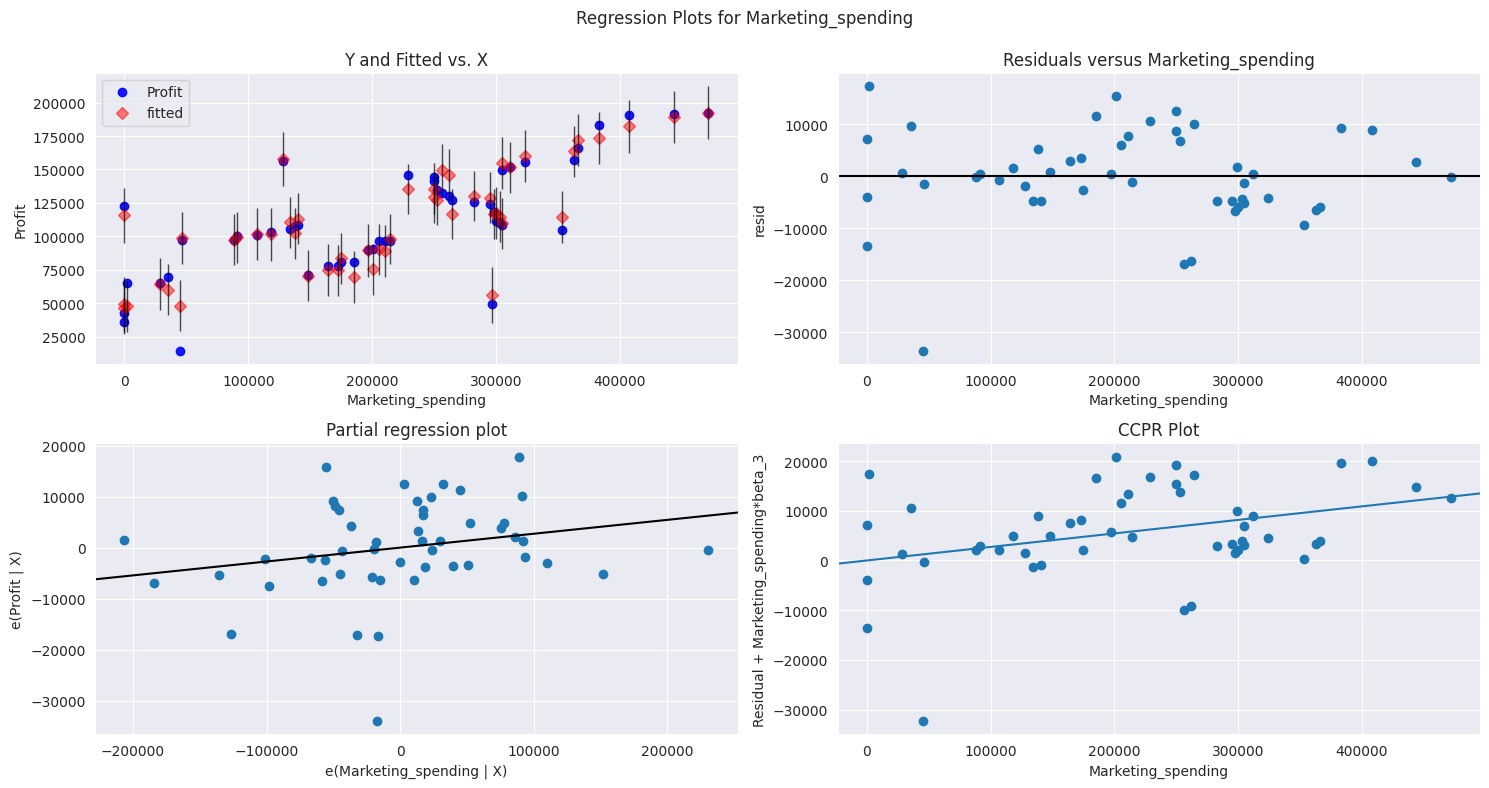

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_spending", fig=fig)
plt.show()

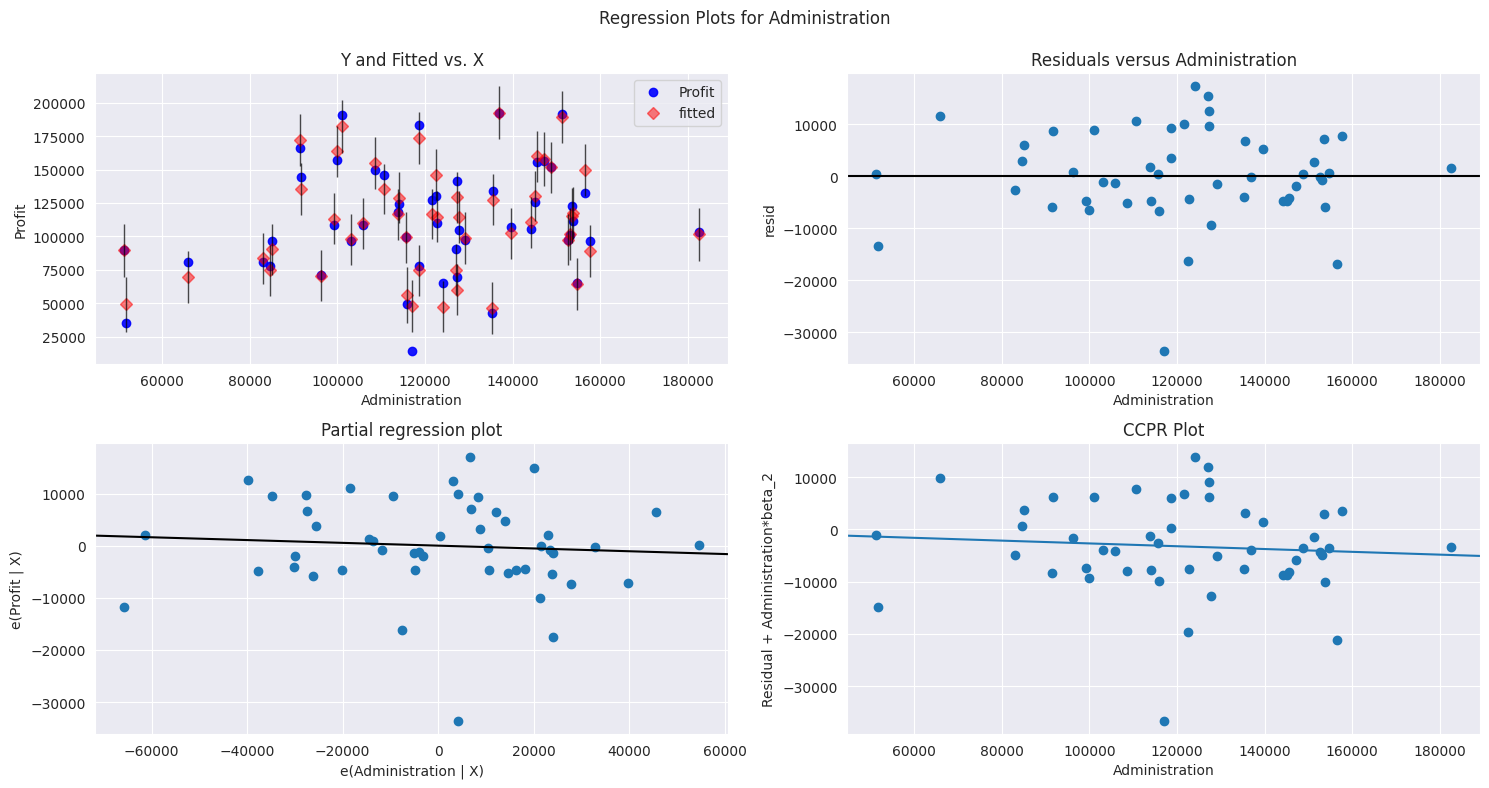

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

In [26]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

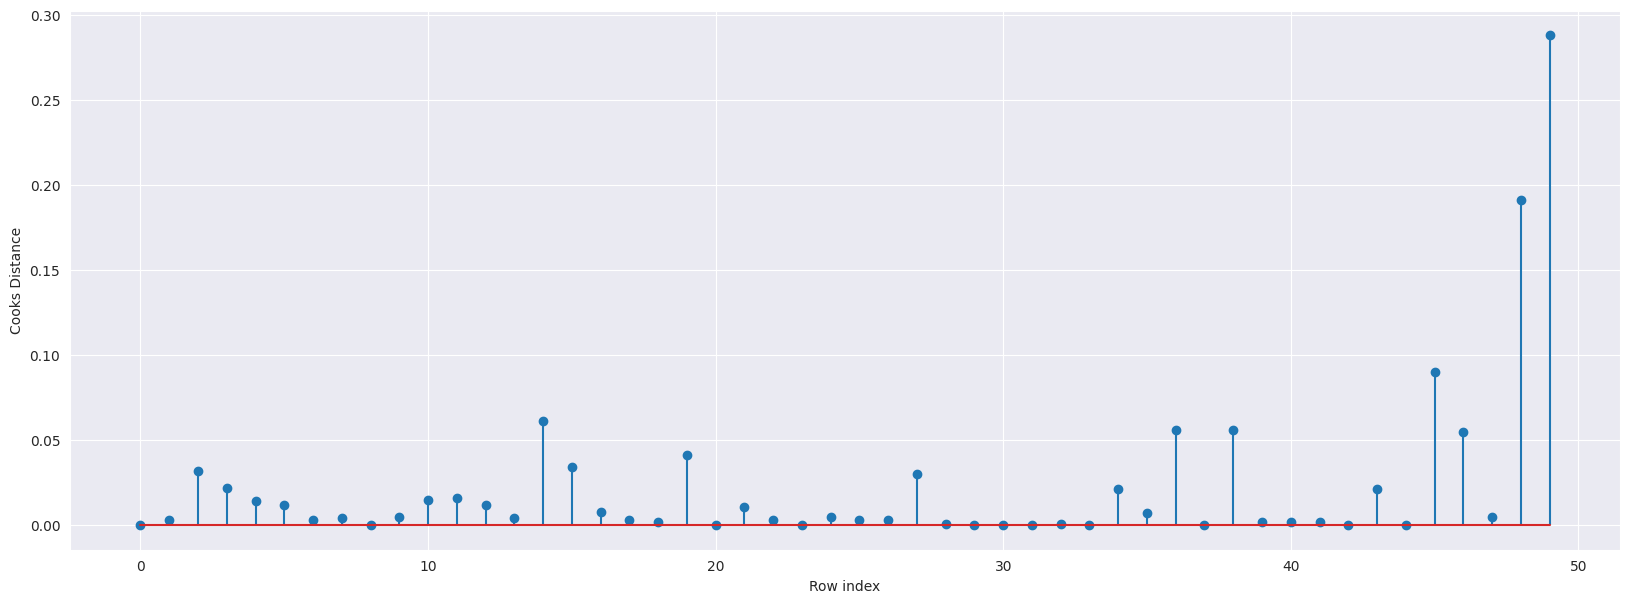

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.min(c))

(49, 9.274347857342245e-06)

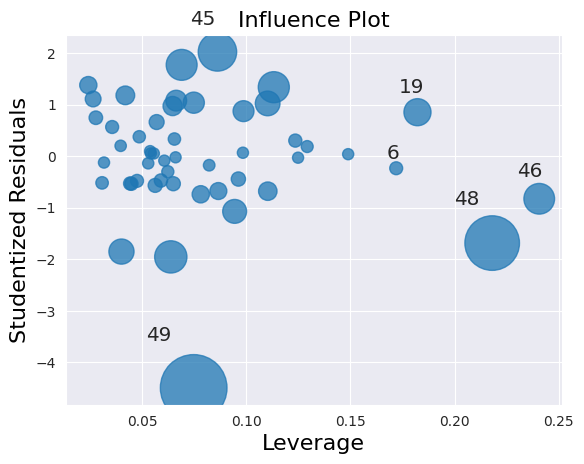

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
k = 3
n = startup_df.shape[0]
leverage_cutoff = 2*((k + 1)/n)
leverage_cutoff

0.16

In [31]:
startup_df.head()

,RnD_Spend,Administration,Marketing_spending,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_model= smf.ols('Profit~RnD_Spend+Marketing_spending',data = startup_df).fit()

In [33]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           2.16e-31
Time:                        17:06:42   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RnD_Spend              0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_spending     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
model_influence_profit = final_model.get_influence()
(c, _) = model_influence_profit.cooks_distance

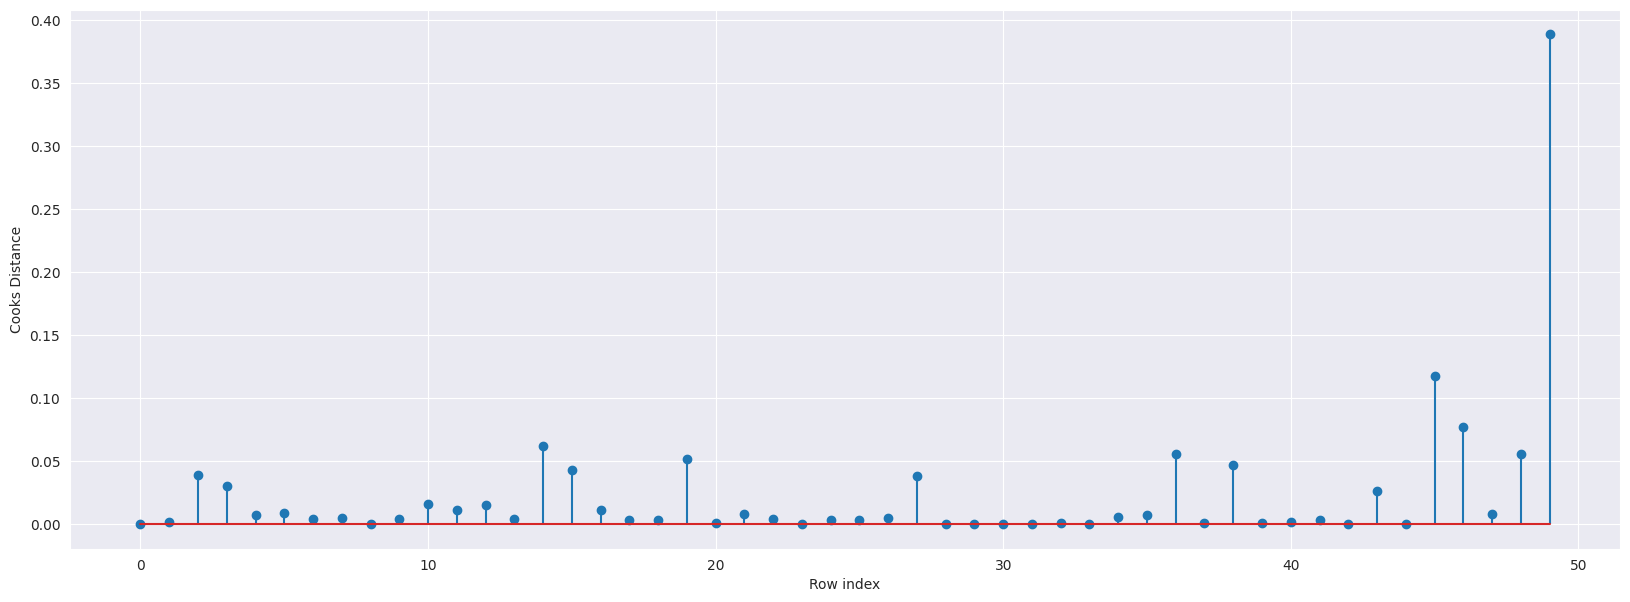

In [35]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');